### Assignment 4
#### Name: Justin Chong
#### Due: 10/24/2023

Derive by hand:

Pg 1

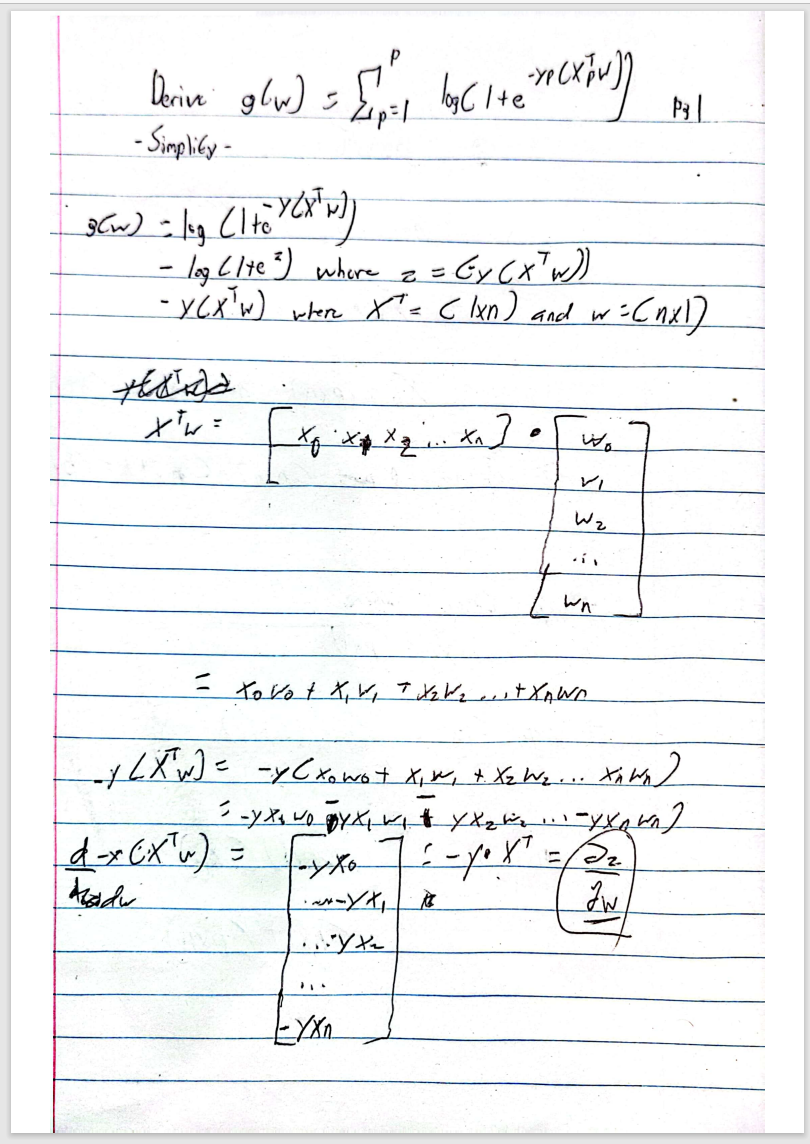

Pg 2

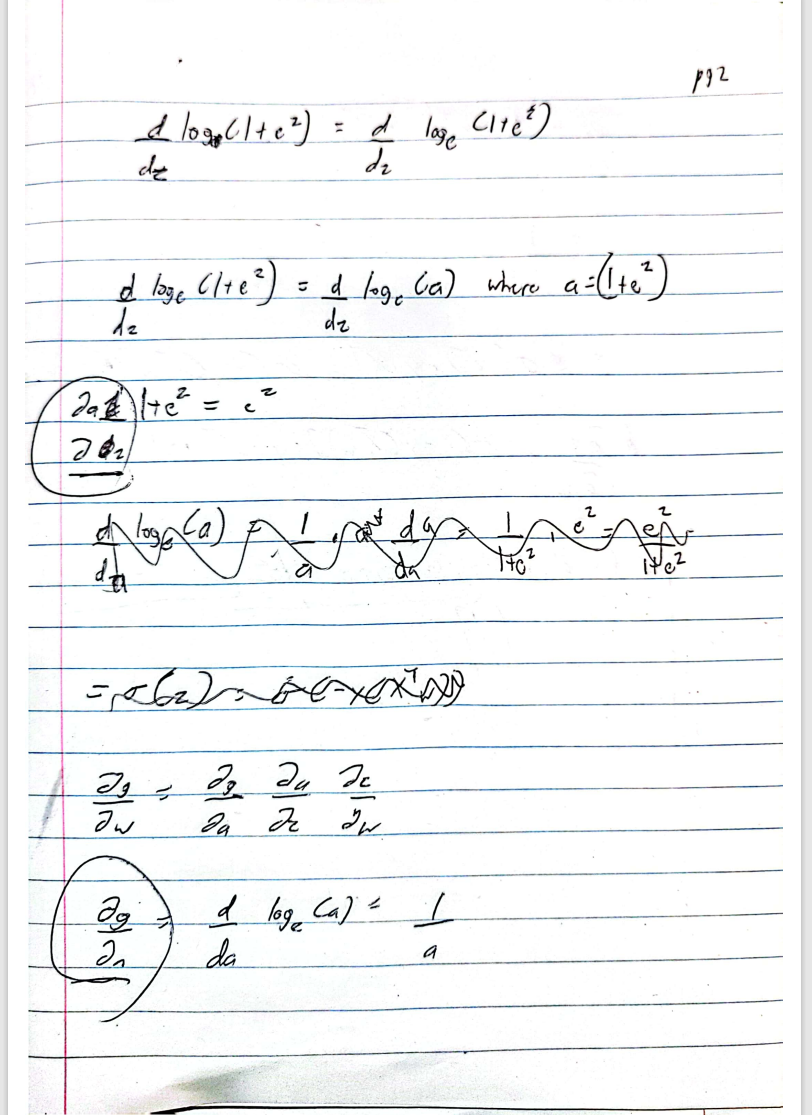

Pg 3

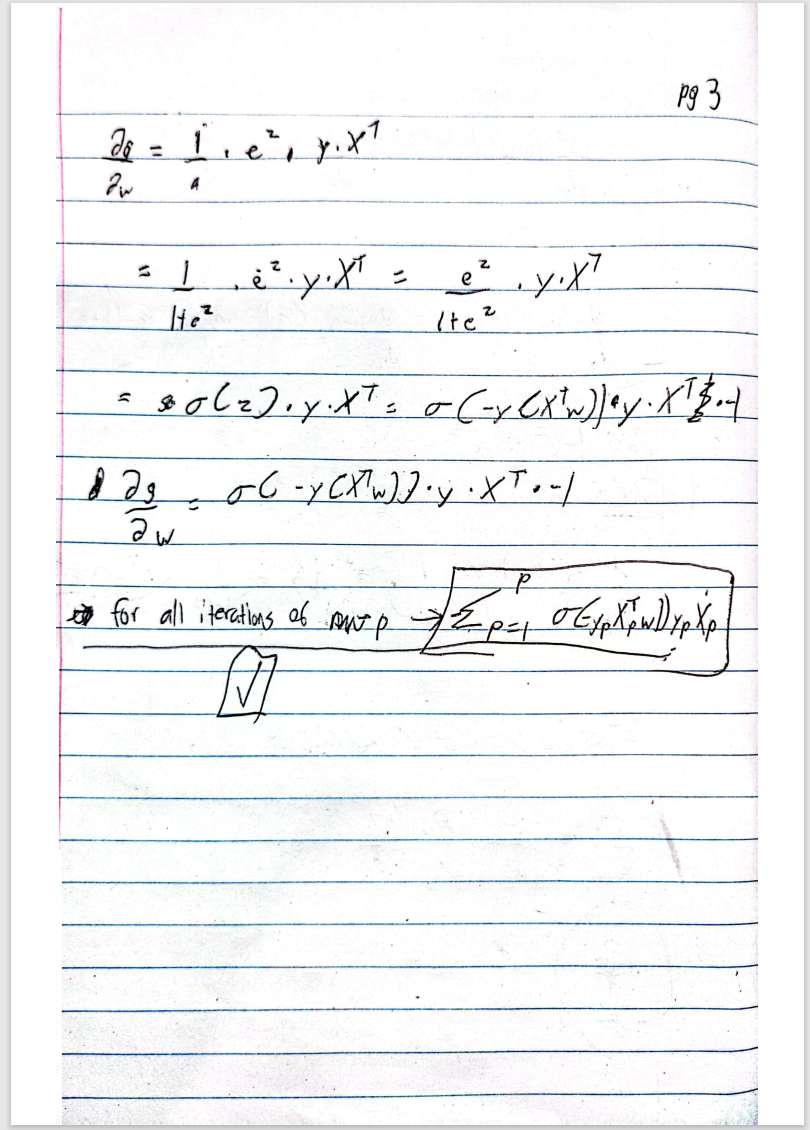

In [1]:
import numpy as np
import pandas as pd


In [2]:
def softmax(w, x, y=np.array([])):
    '''with y argument, function becomes softmax cost function; note y is not possible outcomes of y but actual final y values of p samples
    '''
    if y.size == 0:
        z = -(w@x)
    else: 
        z = -(w@x)*y
    #z = -1*y.T@(w@x)
    z = np.complex128(z)
    return np.log(1+np.exp(z))

def sigmoid(z):
    #complex128 conversion to deal with overflow; I/my py machine have no float128 :(
    z = np.complex128(z)
    return 1/(1+np.exp(-z))

def softmax_gradient(w, x, y):
    z = -y*(x.T@w)
    return -1*(sigmoid(z)*y@(x.T)).T
    #return (-1 * (1 / (1 + np.exp(-z))) @ y @ x.T)

def softmax_desc(w, alpha, k, x, y):
    w_temp = w
    for i in range(0,k):
        #print(alpha*softmax_gradient(w_temp, x, y).T)
        #print((alpha*softmax_gradient(w_temp, x, y)))
        w_temp = w_temp - (alpha*softmax_gradient(w_temp, x, y))
    return w_temp


In [3]:
#this whole cell sets up the x and y from the credit_dataset.csv
data = pd.read_csv("credit_dataset.csv")
#pd initiallys turns the first row of dataset into columns, need to extract out
temp_col = []
for val in data.columns:
    temp_col.append(int(val[0]))
#test = data.columns.astype("int")
columns = np.array([temp_col])


x_other = data.head(-1)
y_final = data.tail(1)
y_final_squeeze = y_final.squeeze()
x_full = np.row_stack([columns,np.array(x_other)])
x_model = (np.row_stack([np.ones([1, x_full.shape[1]]), x_full]))

In [7]:
#sets up necessary functions
def confusion_matrix(y_actual, y_pred):
    tp, tn, fp, fn = 0,0,0,0
    for i in range(y_actual.size):
        if y_pred[i]==y_actual[i]==1:
            tp+=1
        elif y_pred[i]==1 and y_pred[i]!=y_actual[i]:
            fp+=1
        elif y_pred[i]==y_actual[i]==-1:
            tn+=1
        elif y_pred[i]==-1 and y_pred[i]!=y_actual[i]:
            fn+=1
    matrix = f"Confusion Matrix:\n[{tn} {fp}]\n[{fn} {tp}]"
    return matrix
#5e-11, 5.1e-11, 5.2e-11 4.7e-11
#4.2e-11
def accuracy(y_actual, y_pred):
    return (np.sum(np.equal(np.array(y_actual), y_pred))/y_pred.size)*100

In [16]:
#sets up learned weights and y prediction model
acc = .70*100
'''var i is used to count the iteration to see if the softmax_desc can give potentially valid learned weights in a not too long period(if large amount
of iteration is needed or iteration is infinite, shows that the softmax_desc function may need adjustment) The logic for why iteration of var i is 
implemented is association with the logic comment below of the while loop.
'''
i = 0
'''logic for while: if accuracy is 70 percent, this means that the y prediction is an array of all true (70% of the good will be accurate) and
the activation function did not neccessarily chose between multiclasses (2 classes this case) if it only chose 1 class for all values for this data
set (even if a good majority of this data set is good/70%, it should still be likely that atleast 1 of the other 30% negative should be flagged)
This while loop ensures that y prediction is unique where the intended purpose of the activation function is actually shown.'''
while acc == .70*100:
    i += 1
    w = np.array(np.random.uniform(-1,1,[x_model.shape[0],1])).squeeze()
    w_perf = softmax_desc(w, 42e-11, 25000 , x_model, y_final_squeeze)
    y_initial = softmax(w_perf, x_model)
    y_pred = np.where(y_initial>0, 1, -1)
    acc = accuracy(y_final,y_pred)
print(f"Iterated for unique y prediction: {i} times")

C:\Users\tacot\AppData\Local\Temp\ipykernel_15656\3576844514.py:16: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Iterated for unique y prediction: 1 times


In [18]:
#accuracy and confusion matrix
print("Accuracy:")
#acc from previous cell (already calls accuracy on y predict model)
print(acc)
#the range for the accuracy seems to be around .64 to 70.8.
y_final_arr = np.array(y_final)
print()
print(confusion_matrix(np.array(y_final)[0],y_pred))
#Alot of false positives :(

Accuracy:
70.7

Confusion Matrix:
[30 270]
[23 677]
